
                        Prepared by: Ahmad Feroz & Mohammad Omar

-----------------------------------------------------------------------------------------------------------------------------

# Business Understanding

For this project we are going use amazon.com books datasets that are taken from kaggle.com

Amazon.com, Inc. is an American multinational technology company which focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence. It has been referred to as "one of the most influential economic and cultural forces in the world", and is one of the world's most valuable brands. And also, its one of the largest online book stores in most of countries.

In this project we are going to build a model to classify machine learing books from other books based on their title or name.

And also we use python and its different libraries

# Data Understanding and Preparation

As we mention earlier for this project we are using datasets that are taken form kaggle.com and one of them is as follows:

In [1]:
# importing necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

we are using a pandas' method called read_csv for importing or reading a dataset

In [2]:
#the dataset
df1 = pd.read_csv(r"Downloads\CSVFiles\ML_books.csv")


In [3]:
# sample of data
df1.head()

,Name,Autor,Review,Review qntd,Format,Price
0,"Hands-On Machine Learning with Scikit-Learn, K...",Aurélien Géron,4.8 out of 5 stars,"1,808",Paperback,$17.50
1,Machine Learning Design Patterns: Solutions to...,Valliappa Lakshmanan,4.6 out of 5 stars,66,Paperback,$35.49
2,AI and Machine Learning for Coders: A Programm...,Laurence Moroney,4.8 out of 5 stars,29,Paperback,$45.59
3,Machine Learning Engineering,Andriy Burkov,4.7 out of 5 stars,113,Paperback,$35.49
4,Machine Learning: 4 Books in 1: Basic Concepts...,Ethem Mining,4.3 out of 5 stars,106,Kindle,$0.00


## Data information

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         285 non-null    object
 1   Autor        119 non-null    object
 2   Review       201 non-null    object
 3   Review qntd  192 non-null    object
 4   Format       256 non-null    object
 5   Price        261 non-null    object
dtypes: object(6)
memory usage: 13.5+ KB


## Data Description

In [5]:
# decription of data
df1.describe()

,Name,Autor,Review,Review qntd,Format,Price
count,285,119,201,192,256,261
unique,274,99,21,99,8,162
top,Funny Data Sciene Gift - AI Data Scientist Mac...,From,4.5 out of 5 stars,2,Paperback,$0.00
freq,3,6,31,11,112,52


In [6]:
# we are going to see how many rows and columns do we have
df1.shape

(285, 6)

In [7]:
# 285 rows, and 6 columns

For every task that we want to perform later we need to ensure our self from quality of our data. Means we are going to check for short comming data and dirty data like: missing values, duplicated values and etc.

## Missing Data And Data type conversion

Missing Data are those data or values that are missed in a dataset or we can simply say there places are empty in dataset,
Missing data is a common problem before starting any task of data science, if they are not handle, will cause the result of analysis or final outcome to be incorrect.
and missing values in pandas dataframe represented by (NaN).

In [8]:
# checking for missing values
df1.isnull()
# it will show all values that missed with true otherwise false

,Name,Autor,Review,Review qntd,Format,Price
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
280,False,False,False,False,False,False
281,False,True,True,True,False,False
282,False,True,False,False,False,False
283,False,False,False,False,False,False


In [9]:
# number of missing values in each feature or column
df1.isnull().sum()

Name             0
Autor          166
Review          84
Review qntd     93
Format          29
Price           24
dtype: int64

In [10]:
# total number of missing values in our dataset
df1.isnull().sum().sum()

396

For handling missing values we have two methods 1) Deleting missing values 2) Imputing missing values.

1) Deleting missing values: Simply delete the rows or columns that have missing values.

2) Imputing missing values: There are different ways of replacing the missing values.  Replacing with Arbitrary values, with mean, with Mod, with Median , with previous value and with next value.

Note: mean, mod and median only use for numeric values.

In [11]:
# imputing values for (Autor) attribute using forwardfill technique
# forwardfill simply means replacing the missing value with its previous value on that column

df1["Autor"] = df1["Autor"].fillna(method="ffill")

In [12]:
# checking for missing value on autor column
df1["Autor"].isnull().sum()

0

In [13]:
# as we can see the (Autor) column name has spelling mistake we are going to correct it
df1.rename(columns={"Autor": "Author"}, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         285 non-null    object
 1   Author       285 non-null    object
 2   Review       201 non-null    object
 3   Review qntd  192 non-null    object
 4   Format       256 non-null    object
 5   Price        261 non-null    object
dtypes: object(6)
memory usage: 13.5+ KB


In [14]:
# And also we want to to change (Review) to (User Rating) and (Review qntd) to (Reviews) for better undrestanding.
df1.rename(columns={"Review": "User Rating"}, inplace=True)
df1.rename(columns={"Review qntd": "Reviews"}, inplace=True)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         285 non-null    object
 1   Author       285 non-null    object
 2   User Rating  201 non-null    object
 3   Reviews      192 non-null    object
 4   Format       256 non-null    object
 5   Price        261 non-null    object
dtypes: object(6)
memory usage: 13.5+ KB


In [16]:
df1.head()

,Name,Author,User Rating,Reviews,Format,Price
0,"Hands-On Machine Learning with Scikit-Learn, K...",Aurélien Géron,4.8 out of 5 stars,"1,808",Paperback,$17.50
1,Machine Learning Design Patterns: Solutions to...,Valliappa Lakshmanan,4.6 out of 5 stars,66,Paperback,$35.49
2,AI and Machine Learning for Coders: A Programm...,Laurence Moroney,4.8 out of 5 stars,29,Paperback,$45.59
3,Machine Learning Engineering,Andriy Burkov,4.7 out of 5 stars,113,Paperback,$35.49
4,Machine Learning: 4 Books in 1: Basic Concepts...,Ethem Mining,4.3 out of 5 stars,106,Kindle,$0.00


In [17]:
# for (User Rating) column we want to have just the rating part as we can see the data in this column is like
# (4.8 out of 5 stars) we want just the 4.8 not the whole sentence.

# for doing this we write a function
def formatUserRating(a):
    if type(a) == type(""):
        result = a.split(" ")
        return result[0]
    else:
        return np.nan

# apply function on that column
df1["User Rating"] = df1["User Rating"].apply(formatUserRating)

In [18]:
df1.head()

,Name,Author,User Rating,Reviews,Format,Price
0,"Hands-On Machine Learning with Scikit-Learn, K...",Aurélien Géron,4.8,"1,808",Paperback,$17.50
1,Machine Learning Design Patterns: Solutions to...,Valliappa Lakshmanan,4.6,66,Paperback,$35.49
2,AI and Machine Learning for Coders: A Programm...,Laurence Moroney,4.8,29,Paperback,$45.59
3,Machine Learning Engineering,Andriy Burkov,4.7,113,Paperback,$35.49
4,Machine Learning: 4 Books in 1: Basic Concepts...,Ethem Mining,4.3,106,Kindle,$0.00


In [19]:
# and we also convert the (User Rating) feature data type to numeric
# and then we can impute the missing values in this feature with mean of this feature
df1["User Rating"] = pd.to_numeric(df1["User Rating"])

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         285 non-null    object 
 1   Author       285 non-null    object 
 2   User Rating  201 non-null    float64
 3   Reviews      192 non-null    object 
 4   Format       256 non-null    object 
 5   Price        261 non-null    object 
dtypes: float64(1), object(5)
memory usage: 13.5+ KB


In [21]:
df1["User Rating"].isnull().sum()

84

In [22]:
# handling missing values of (User Rating) feature with mean
df1["User Rating"] = df1["User Rating"].fillna(np.mean(df1["User Rating"]))

In [23]:
# checking for missing values in (User Rating)
df1["User Rating"].isnull().sum()

0

In [24]:
df1.head()

,Name,Author,User Rating,Reviews,Format,Price
0,"Hands-On Machine Learning with Scikit-Learn, K...",Aurélien Géron,4.8,"1,808",Paperback,$17.50
1,Machine Learning Design Patterns: Solutions to...,Valliappa Lakshmanan,4.6,66,Paperback,$35.49
2,AI and Machine Learning for Coders: A Programm...,Laurence Moroney,4.8,29,Paperback,$45.59
3,Machine Learning Engineering,Andriy Burkov,4.7,113,Paperback,$35.49
4,Machine Learning: 4 Books in 1: Basic Concepts...,Ethem Mining,4.3,106,Kindle,$0.00


In [25]:
# chnage (Reviews) column data type to numeric
# to convert (Reviews) column data type to numeric first we need to remove comma from its values ---> like (1,808)
# otherwise it we give errors

df1["Reviews"] = df1["Reviews"].replace(",", "", regex=True)

In [26]:
# check for remov comma
df1["Reviews"].head()

0    1808
1      66
2      29
3     113
4     106
Name: Reviews, dtype: object

In [27]:
# and now we can change its data type to numeric
df1["Reviews"] = pd.to_numeric(df1["Reviews"])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         285 non-null    object 
 1   Author       285 non-null    object 
 2   User Rating  285 non-null    float64
 3   Reviews      192 non-null    float64
 4   Format       256 non-null    object 
 5   Price        261 non-null    object 
dtypes: float64(2), object(4)
memory usage: 13.5+ KB


In [28]:
# missing values of (Reviews) feature
df1["Reviews"].isnull().sum()

93

In [29]:
# handling missing values of (Reviews) feature with mean
df1["Reviews"] = df1["Reviews"].fillna(np.mean(df1["Reviews"]))
df1["Reviews"].isnull().sum()

0

In [30]:
# missing values of (Format) feature
df1["Format"].isnull().sum()

29

In [33]:
# handling missing values of (Format) feature with backwardfill technique (next Value)
df1["Format"] = df1["Format"].fillna(method="bfill")
df1["Format"].isnull().sum()

0

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         285 non-null    object 
 1   Author       285 non-null    object 
 2   User Rating  285 non-null    float64
 3   Reviews      285 non-null    float64
 4   Format       285 non-null    object 
 5   Price        261 non-null    object 
dtypes: float64(2), object(4)
memory usage: 13.5+ KB


In [35]:
# the (Price) attribute must also be numeric
df1["Price"].head()

0    $17.50
1    $35.49
2    $45.59
3    $35.49
4     $0.00
Name: Price, dtype: object

In [36]:
# for converting or numeric first we need to remove the dollor sign
def formatPrice(a):
    if type(a) == type(""):
        result = a.split("$")
        return result[1]
    else:
        return np.nan

In [37]:
df1["Price"] = df1["Price"].apply(formatPrice)
df1["Price"].head()

0    17.50
1    35.49
2    45.59
3    35.49
4     0.00
Name: Price, dtype: object

In [38]:
# now we can convert to numeric
df1["Price"] = pd.to_numeric(df1["Price"])

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         285 non-null    object 
 1   Author       285 non-null    object 
 2   User Rating  285 non-null    float64
 3   Reviews      285 non-null    float64
 4   Format       285 non-null    object 
 5   Price        261 non-null    float64
dtypes: float64(3), object(3)
memory usage: 13.5+ KB


In [40]:
# (Price) feature missing values
df1["Price"].isnull().sum()

24

In [41]:
# imputing values for (User Rating) attribute useing mean of that attribute

df1["Price"] = df1["Price"].fillna(np.mean(df1["Price"]))
df1["Price"].isnull().sum()

0

In [42]:
# checking for missing values for all data set after handling
df1.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Format         0
Price          0
dtype: int64

In [43]:
# checking for datatypes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         285 non-null    object 
 1   Author       285 non-null    object 
 2   User Rating  285 non-null    float64
 3   Reviews      285 non-null    float64
 4   Format       285 non-null    object 
 5   Price        285 non-null    float64
dtypes: float64(3), object(3)
memory usage: 13.5+ KB


## Duplicate Data

"Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods

In [44]:
# checking for duplicates
df1.duplicated().sum()

6

In [45]:
# we can see there is 6 books that are duplicated
# we are going to remove those duplicated rows

# First we want see those duplicated rows
df1.loc[df1.duplicated(), :]

,Name,Author,User Rating,Reviews,Format,Price
68,Machine Learning: New and Collected Stories,",",4.50000,167.000000,Audible Audiobook,0.00
89,Funny Data Sciene Gift - AI Data Scientist Mac...,Matt Taddy,4.39602,143.677083,Paperback,17.99
117,Data Sciene Gift - Data Scientist Machine Lear...,From,4.39602,143.677083,Kindle,17.99
199,Machine Learning,From,5.00000,1.000000,Prime Video,1.99
219,Artificial Intelligence: A Modern Approach (Pe...,Stuart Russell,4.60000,174.000000,Hardcover,159.99
220,Keras to Kubernetes: The Journey of a Machine ...,Dattaraj Rao,3.80000,6.000000,Paperback,23.47


In [46]:
# these are rows that are duplicated we are going ro remove them
df1 = df1.drop_duplicates()

In [47]:
df1.duplicated().sum()

0

In [48]:
# all duplicated rows remove successfully.

## Outliers 

In simple terms, an outlier is an extremely high or extremely low data point relative to the nearest data point and the rest of the neighboring co-existing values in a data graph or dataset.

In [49]:
# we are checking outliers for numeric attributes

In [50]:
# if we want to see the outliers by graphs we can use seaborn library

<AxesSubplot:xlabel='User Rating'>

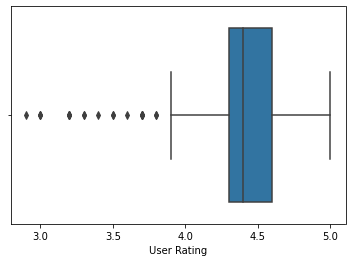

In [51]:
# visualizing outliers for (User Rating) feature
sns.boxplot(x=df1["User Rating"])

<AxesSubplot:xlabel='Reviews'>

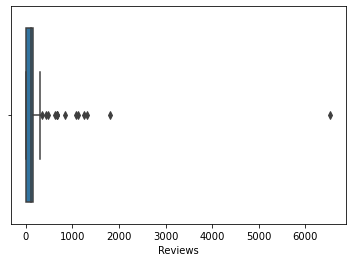

In [52]:
# visualizing outliers for (Reviews) feature
sns.boxplot(x=df1["Reviews"])

<AxesSubplot:xlabel='Price'>

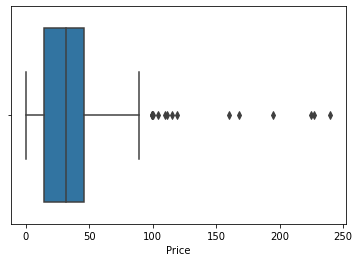

In [53]:
# visualizing outliers for (Price) feature
sns.boxplot(x=df1["Price"])

In [54]:
# as we can see there is outliers in our dataset
# for removing does outliers we are useing IQR

# function (outliers) returns a list of index of outliers
def outliers(df, ft):
    Q1 = np.percentile(df[ft], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df[ft], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
    
    return ls

In [55]:
# creating an empty list to store the output indices from multiple columns

index_list = []
for feature in ["User Rating", "Reviews", "Price"]:
    index_list.extend(outliers(df1, feature))

In [56]:
print(index_list)

[9, 19, 25, 47, 80, 131, 163, 191, 212, 213, 218, 228, 229, 230, 233, 235, 236, 253, 254, 262, 270, 280, 0, 5, 7, 8, 10, 18, 28, 36, 96, 104, 240, 246, 276, 282, 22, 45, 79, 107, 126, 131, 134, 135, 146, 198, 201, 212, 217, 248, 260]


In [57]:
# define a function called "remove" which returns a cleaned dataframe without ouliers

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [58]:
df_cleaned = remove(df1, index_list)

In [59]:
# dataframe with outliers
df1.shape

(279, 6)

In [60]:
# after removing outliers

df_cleaned.shape

(230, 6)

## Normalization

Data normalization is the method of organizing data to appear similar across all records and fields. Performing so always results in getting higher quality data.

In [61]:
# normalizing (Reviews) feature -- MinMaxScaler method --
normalizeReviews = df1["Reviews"]
minF = normalizeReviews.min(axis=0)
maxF = normalizeReviews.max(axis=0)

normalizeReviews = normalizeReviews.apply(lambda v: (v-minF) / (maxF-minF))
normalizeReviews

0      0.276553
1      0.009948
2      0.004285
3      0.017141
4      0.016070
         ...   
280    0.002296
281    0.021836
282    0.191001
283    0.000459
284    0.021836
Name: Reviews, Length: 279, dtype: float64

In [62]:
# max value
normalizeReviews.max()

1.0

In [63]:
# min value
normalizeReviews.min()

0.0

## Standardization 

Standardization entails scaling data to fit a standard normal distribution. A standard normal distribution is defined as a distribution with a mean of 0 and a standard deviation of 1.

In [64]:
# standradizing (Reviews) attribute (z-score)
standardizeReviews = df1["Reviews"]
mean = np.mean(standardizeReviews)
SD = np.std(standardizeReviews)

standardizeReviews = standardizeReviews.apply(lambda x: (x-mean) / SD)
standardizeReviews.head()

0    3.852376
1   -0.181767
2   -0.267452
3   -0.072924
4   -0.089135
Name: Reviews, dtype: float64

In [65]:
# standardization using scipy module

In [66]:
import scipy.stats as stats
values = df1["Reviews"]
zscores = stats.zscore(values)
print(zscores.head())

0    3.852376
1   -0.181767
2   -0.267452
3   -0.072924
4   -0.089135
Name: Reviews, dtype: float64


## Cosine Similarity

Cosine Similarity is a measurement that quantifies the similarity between two or more vectors. The cosine similarity is the cosine of the angle between vectors. The vectors are typically non-zero and are within an inner product space.

The cosine similarity is described mathematically as the division between the dot product of vectors and the product of the euclidean norms or magnitude of each vector.

 - Applications
 
 1.  Document Similarity
 
 2. Pose Matching

In [67]:
# In Here we use it for finding the documnet similarity

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

def cosineSimilarity(x, y):
 
    # Ensure length of x and y are the same
    if len(x) != len(y) :
        return None
    
    # Compute the dot product between x and y
    dotProduct = np.dot(x, y)
    
    # Compute the magnitudes of x and y
    magnitude_x = np.sqrt(np.sum(x**2))
    magnitude_y = np.sqrt(np.sum(y**2))
    
    consine_similarity = dotProduct / (magnitude_x * magnitude_y)
    
    return consine_similarity

In [69]:
# cosine similarity between two first row
twoBookName = list((df1["Name"][0], df1["Name"][1]))
print(twoBookName)

['Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems', 'Machine Learning Design Patterns: Solutions to Common Challenges in Data Preparation, Model Building, and MLOps']


In [70]:
# Create a matrix to represent the twoBookName
victorize_list = CountVectorizer().fit_transform(twoBookName).toarray()
print(victorize_list)
   

[[2 1 0 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1]
 [1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0]]


In [71]:
cos_sim_2BookName = cosineSimilarity(victorize_list[0], victorize_list[1])


In [72]:
print('Cosine Similarity between: ')
print('Book Name 1 and Book Name 2: ', cos_sim_2BookName)

Cosine Similarity between: 
Book Name 1 and Book Name 2:  0.28867513459481287


## Euclidean distance

Euclidean distance calculates the distance between two real-valued vectors. You are most likely to use Euclidean distance when calculating the distance between two rows of data that have numerical values, such a floating point or integer values.

In [73]:
def euclideanDistance(point1, point2):
    
    euclidean_distance = np.sqrt(np.sum(np.square(point1 - point2)))
    
    return euclidean_distance

In [74]:
# euclidean distance between numneric value of the row 1 and 2 of the dataset
# (User Rating, Reviews)
point1 = np.array((df1["User Rating"][0], df1["Reviews"][0]))
point2 = np.array((df1["User Rating"][1], df1["Reviews"][1]))


euclidean_dis_1_2 = euclideanDistance(point1, point2)
print("Euclidean Distance Between:")
print("Book 1 and Book 2: ", euclidean_dis_1_2)

Euclidean Distance Between:
Book 1 and Book 2:  1742.0000114810562


## City block or Manhattan distance

The Manhattan distance, often called Taxicab distance or City Block distance, calculates the distance between real-valued vectors. Imagine vectors that describe objects on a uniform grid such as a chessboard. Manhattan distance then refers to the distance between two vectors if they could only move right angles.

In [75]:
def cityBlock(point1, point2):
    
    city_block = np.sum(np.abs(point1 - point2))
    
    return city_block

In [76]:
# city block distance between numneric value of the row 1 and 2 of the dataset
# (User Rating, Reviews, Price)

point1 = np.array((df1["User Rating"][0], df1["Reviews"][0], df1["Price"][0]))
point2 = np.array((df1["User Rating"][1], df1["Reviews"][1], df1["Price"][1]))

cityBlock_dis_1_2 = cityBlock(point1, point2)
print("City block Distance Between:")
print("Book 1 and Book 2: ", cityBlock_dis_1_2)

City block Distance Between:
Book 1 and Book 2:  1760.19


## Visualization

Data visualization is the graphical representation of information and data in a pictorial or graphical format(Example: charts, graphs, and maps). Data visualization tools provide an accessible way to see and understand trends, patterns in data, and outliers.

In applied Statistics and Machine Learning, Data Visualization is one of the most important skills. Data visualization provides an important suite of tools for identifying a qualitative understanding

In [103]:
# in here we also visualize our data to deep undrestand our data

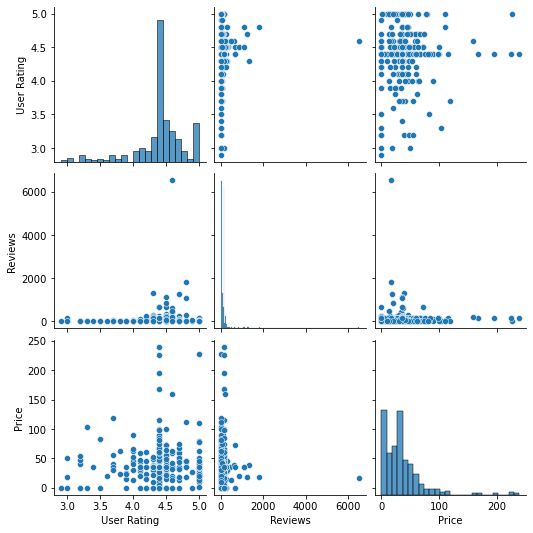

In [104]:
sns.pairplot(df1)

<AxesSubplot:xlabel='User Rating', ylabel='Reviews'>

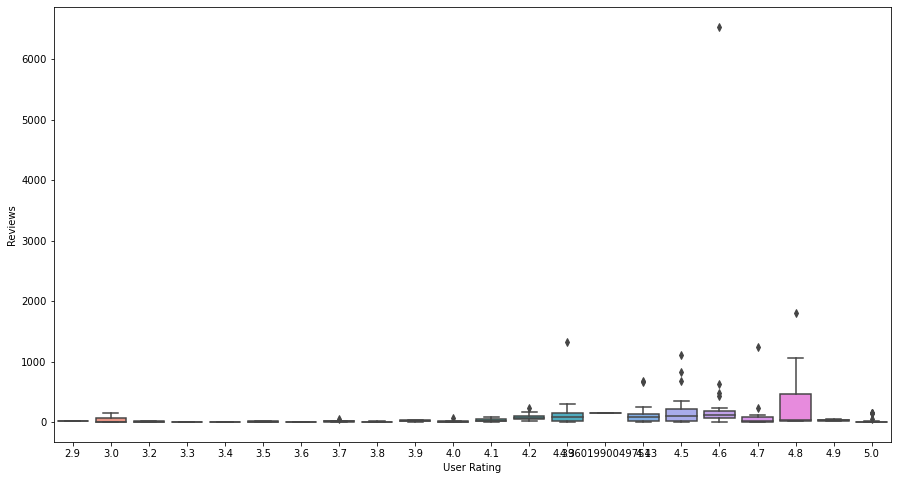

In [105]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df1['User Rating'],y=df1['Reviews'])

<Figure size 1296x1296 with 0 Axes>

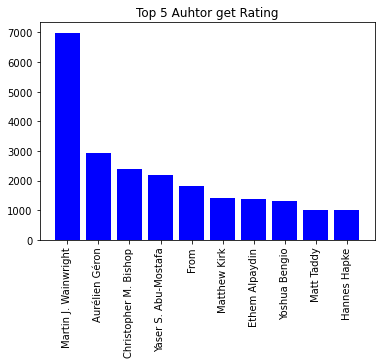

<Figure size 1296x1296 with 0 Axes>

In [106]:
x=df1.groupby('Author')['Reviews'].agg([sum]).sort_values(by=('sum'),ascending=False).head(10)
q3=pd.DataFrame(x)
q3.reset_index(inplace=True)
plt.bar(q3['Author'],q3['sum'],color="blue")
plt.title("Top 5 Auhtor get Rating")
plt.xticks(rotation=90)
plt.figure(figsize=(18,18))

<Figure size 1296x1296 with 0 Axes>

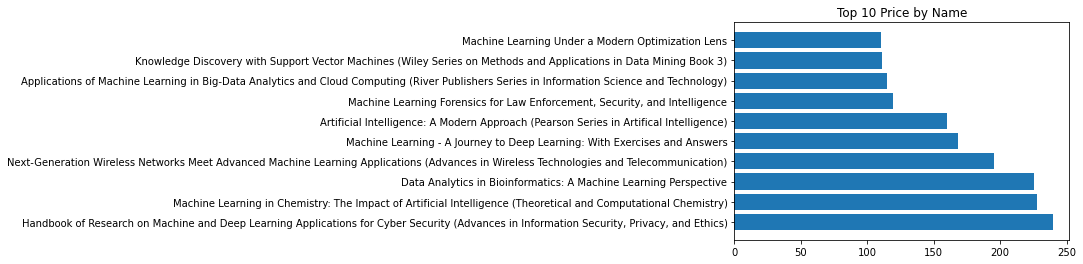

<Figure size 1296x1296 with 0 Axes>

In [107]:
x=df1.groupby('Name')['Price'].agg([sum]).sort_values(by=('sum'),ascending=False).head(10)
q4=pd.DataFrame(x)
q4.reset_index(inplace=True)
plt.barh(q4['Name'],q4['sum'])
plt.title("Top 10 Price by Name")
# plt.xticks(rotation=90)
plt.figure(figsize=(18,18))

## Adding New Column

since all the books in the above dataset are Machine learning books we are going to add a new column with name of (Category)
to show the category of the books
because we need it when we want to predict whether a book is a machine learing book or not.

In [108]:
df1["Category"] = "Machine Learning"

In [109]:
df1.head()

,Name,Author,User Rating,Reviews,Format,Price,Category
0,"Hands-On Machine Learning with Scikit-Learn, K...",Aurélien Géron,4.8,1808.0,Paperback,17.50,Machine Learning
1,Machine Learning Design Patterns: Solutions to...,Valliappa Lakshmanan,4.6,66.0,Paperback,35.49,Machine Learning
2,AI and Machine Learning for Coders: A Programm...,Laurence Moroney,4.8,29.0,Paperback,45.59,Machine Learning
3,Machine Learning Engineering,Andriy Burkov,4.7,113.0,Paperback,35.49,Machine Learning
4,Machine Learning: 4 Books in 1: Basic Concepts...,Ethem Mining,4.3,106.0,Kindle,0.00,Machine Learning


In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 284
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         279 non-null    object 
 1   Author       279 non-null    object 
 2   User Rating  279 non-null    float64
 3   Reviews      279 non-null    float64
 4   Format       279 non-null    object 
 5   Price        279 non-null    float64
 6   Category     279 non-null    object 
dtypes: float64(3), object(4)
memory usage: 25.5+ KB


## Data Selection

Removing unnecessary columns: for our classification model we just need the (Name) column and (Category) column
we are removing all other columns

In [111]:
# we first copy our dataframe
# and then remove the unnecessary cloumns from it
new_df1 = df1[:]

del new_df1["Author"]
del new_df1["User Rating"]
del new_df1["Reviews"]
del new_df1["Format"]
del new_df1["Price"]

In [112]:
new_df1.head()

,Name,Category
0,"Hands-On Machine Learning with Scikit-Learn, K...",Machine Learning
1,Machine Learning Design Patterns: Solutions to...,Machine Learning
2,AI and Machine Learning for Coders: A Programm...,Machine Learning
3,Machine Learning Engineering,Machine Learning
4,Machine Learning: 4 Books in 1: Basic Concepts...,Machine Learning


In [113]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 284
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      279 non-null    object
 1   Category  279 non-null    object
dtypes: object(2)
memory usage: 6.5+ KB


## Data Integration

For our model to work well we are going to merge a new Amazon.com books dataset that contain books other then Machine learning books.


In [129]:
df2 = pd.read_csv(r"Downloads\CSVFiles\amazonBooks.csv")
df2.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [130]:
# first we remove the unnecessary features

del df2["Author"]
del df2["User Rating"]
del df2["Reviews"]
del df2["Price"]
del df2["Year"]
del df2["Genre"]

In [131]:
df2.head()

,Name
0,10-Day Green Smoothie Cleanse
1,11/22/63: A Novel
2,12 Rules for Life: An Antidote to Chaos
3,1984 (Signet Classics)
4,"5,000 Awesome Facts (About Everything!) (Natio..."


In [132]:
# cleaning the second dataframe

# checking for missing value
df2.isnull().sum()

Name    0
dtype: int64

In [133]:
# checking for duplicates
df2["Name"] = df2["Name"].str.title().str.strip()
df2["Name"].duplicated().sum()

200

In [134]:
# droping duplicates
df2 = df2.drop_duplicates()

In [135]:
df2["Name"].duplicated().sum()

0

In [136]:
# add the (Category) feature into the second dataframe
df2["Category"] = "Others"

In [137]:
df2.shape

(350, 2)

In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 546
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      350 non-null    object
 1   Category  350 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


In [139]:
# outer: use union of keys from both frames, similar to a SQL full outer join; sort keys lexicographically.
final_df = pd.merge(new_df1, df2, how="outer")
final_df.head()

,Name,Category
0,"Hands-On Machine Learning with Scikit-Learn, K...",Machine Learning
1,Machine Learning Design Patterns: Solutions to...,Machine Learning
2,AI and Machine Learning for Coders: A Programm...,Machine Learning
3,Machine Learning Engineering,Machine Learning
4,Machine Learning: 4 Books in 1: Basic Concepts...,Machine Learning


In [140]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      629 non-null    object
 1   Category  629 non-null    object
dtypes: object(2)
memory usage: 14.7+ KB


In [141]:
# checking for missing values in merge dataframe
final_df.isnull().sum()

Name        0
Category    0
dtype: int64

In [142]:
# checking for duplicate values in merge dataframe
final_df.duplicated().sum()

5

In [143]:
final_df = final_df.drop_duplicates()

In [144]:
final_df.duplicated().sum()

0

In [145]:
final_df.shape

(624, 2)

## Shuffling dataframe

We are going to suffle our new dataframe because now all books from one category place togather, it mean all rows in the data frame are order based on category, 
its because when we merge the two dataframe the second data frame place on the end of the first dataframe.


In [146]:
# the frac keyword argument specifies the fraction of rows to retrun in the random sample,
# so frac=1 means retrun all rows in random order.
# specifying drop=True prevents .reset_index from creating a column cantaining the old index entries.
final_df = final_df.sample(frac=1).reset_index(drop=True)

In [147]:
final_df.shape

(624, 2)

In [148]:
final_df.head()

,Name,Category
0,Calm The F*Ck Down: An Irreverent Adult Colori...,Others
1,"Toy Hammer w/ Lights, Learning Mode and Music ...",Machine Learning
2,The Secret Life of Chaos,Machine Learning
3,Born To Run,Others
4,An Introduction to Variational Autoencoders (F...,Machine Learning


In [149]:
final_df.tail()

,Name,Category
619,The 5000 Year Leap,Others
620,Machine Learning: 2 Books in 1: An Introductio...,Machine Learning
621,Python Machine Learning,Machine Learning
622,"Unbroken: A World War Ii Story Of Survival, Re...",Others
623,Machine Learning and AI for Healthcare: Big Da...,Machine Learning


# Modeling

As we mention at the beginning we are going to build a model to classify a book whether it is a machine learning book or not by the use of book names, for this task to be done we are using a machine learning algorithm called Naive Bayes, if we want to be specific we are using Multinomial Naive Bayes.

## Multinomial Naive Bayes

The Multinomial Naive Bayes algorithm is a Bayesian learning approach popular in Natural Language Processing (NLP). The program guesses the tag of a text, such as an email or a newspaper story, using the Bayes theorem. It calculates each tag's likelihood for a given sample and outputs the tag with the greatest chance.

## Model Development

In [150]:
# importing libraries
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [151]:
# create transform
vectorizer = CountVectorizer()

In [152]:
def text_cleaning(a):
    
    # deleting or removing punctuations it will split to charecters
    remove_punctuation = [char for char in a if char not in string.punctuation]
    
    # join does charecters 
    remove_punctuation = ''.join(remove_punctuation)
    
    # agin spliting or tokenizeing the words and removing the stop words and return them as a list 
    return [word for word in remove_punctuation.split() if word.lower() not in stopwords.words("english")]

In [153]:
final_df.head()

,Name,Category
0,Calm The F*Ck Down: An Irreverent Adult Colori...,Others
1,"Toy Hammer w/ Lights, Learning Mode and Music ...",Machine Learning
2,The Secret Life of Chaos,Machine Learning
3,Born To Run,Others
4,An Introduction to Variational Autoencoders (F...,Machine Learning


In [154]:
# data after removing punctuations and stop words
print(final_df.iloc[:,0].apply(text_cleaning))

0      [Calm, FCk, Irreverent, Adult, Coloring, Book,...
1      [Toy, Hammer, w, Lights, Learning, Mode, Music...
2                                  [Secret, Life, Chaos]
3                                            [Born, Run]
4      [Introduction, Variational, Autoencoders, Foun...
                             ...                        
619                                   [5000, Year, Leap]
620    [Machine, Learning, 2, Books, 1, Introduction,...
621                          [Python, Machine, Learning]
622    [Unbroken, World, War, Ii, Story, Survival, Re...
623    [Machine, Learning, AI, Healthcare, Big, Data,...
Name: Name, Length: 624, dtype: object


In [155]:
bow_transformer = CountVectorizer(analyzer=text_cleaning).fit(final_df["Name"])

bow_transformer.vocabulary_

{'Calm': 251,
 'FCk': 548,
 'Irreverent': 821,
 'Adult': 71,
 'Coloring': 312,
 'Book': 213,
 'Series': 1393,
 'Toy': 1597,
 'Hammer': 697,
 'w': 1852,
 'Lights': 921,
 'Learning': 890,
 'Mode': 1025,
 'Music': 1044,
 '–': 1854,
 'Baby': 158,
 'Plays': 1182,
 '6': 43,
 'Short': 1414,
 'Kids': 853,
 'Songs': 1447,
 'Counts': 359,
 '110': 5,
 'Changes': 281,
 'Funny': 621,
 'Expressions': 545,
 '12': 8,
 'Months': 1032,
 'Older': 1093,
 'Secret': 1383,
 'Life': 912,
 'Chaos': 282,
 'Born': 216,
 'Run': 1348,
 'Introduction': 815,
 'Variational': 1663,
 'Autoencoders': 144,
 'Foundations': 606,
 'Trendsr': 1610,
 'Machine': 951,
 'Towers': 1595,
 'Midnight': 1005,
 'Wheel': 1695,
 'Time': 1575,
 'Thirteen': 1564,
 'Second': 1382,
 'Bree': 229,
 'Tanner': 1534,
 'Eclipse': 488,
 'Novella': 1080,
 'Twilight': 1625,
 'Saga': 1357,
 'Robotics': 1338,
 'AI': 52,
 'Evolution': 530,
 'Robot': 1336,
 'TShirt': 1527,
 'Cloud': 303,
 'Computing': 334,
 'Killing': 857,
 'Kennedy': 844,
 'End': 505,


In [156]:
# encode document
title_bow = bow_transformer.transform(final_df["Name"])

print(title_bow)

  (0, 71)	1
  (0, 213)	2
  (0, 251)	1
  (0, 312)	1
  (0, 548)	1
  (0, 821)	2
  (0, 1393)	1
  (1, 5)	1
  (1, 8)	1
  (1, 43)	1
  (1, 158)	2
  (1, 281)	1
  (1, 359)	1
  (1, 545)	1
  (1, 621)	1
  (1, 697)	2
  (1, 853)	2
  (1, 890)	1
  (1, 921)	2
  (1, 1025)	2
  (1, 1032)	1
  (1, 1044)	1
  (1, 1093)	1
  (1, 1182)	1
  (1, 1414)	1
  :	:
  (620, 890)	1
  (620, 951)	1
  (620, 978)	1
  (620, 1369)	1
  (620, 1640)	1
  (621, 890)	1
  (621, 951)	1
  (621, 1259)	1
  (622, 770)	1
  (622, 1295)	1
  (622, 1313)	1
  (622, 1487)	1
  (622, 1514)	1
  (622, 1634)	1
  (622, 1681)	1
  (622, 1720)	1
  (623, 52)	1
  (623, 196)	1
  (623, 402)	1
  (623, 715)	1
  (623, 716)	1
  (623, 780)	1
  (623, 890)	1
  (623, 951)	1
  (623, 1113)	1


In [157]:
X = title_bow.toarray()
print(X)

X.shape # 624 seperate words in our dataset and 1855 rows

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 2 0 2]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(624, 1855)

In [158]:

#TF-IDF ALgo -term frequency-inverse document frequencey to know the most significant words

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(title_bow)
print(tfidf_transformer)

title_tfidf = tfidf_transformer.transform(title_bow)
print(title_tfidf)   # got tfidf values for whole vocabulary 
print(title_tfidf.shape)

TfidfTransformer()
  (0, 1393)	0.20576310236163137
  (0, 821)	0.6987841077166791
  (0, 548)	0.3134848159841625
  (0, 312)	0.2485876928747754
  (0, 251)	0.34939205385833955
  (0, 213)	0.33191810200550953
  (0, 71)	0.27757757810998546
  (1, 1854)	0.2830278941530326
  (1, 1852)	0.32752375487077073
  (1, 1597)	0.27417420359965133
  (1, 1447)	0.16376187743538537
  (1, 1414)	0.14693196781706777
  (1, 1182)	0.16376187743538537
  (1, 1093)	0.16376187743538537
  (1, 1044)	0.15391701141814326
  (1, 1032)	0.14693196781706777
  (1, 1025)	0.32752375487077073
  (1, 921)	0.32752375487077073
  (1, 890)	0.04865869582045847
  (1, 853)	0.22360031373445619
  (1, 697)	0.3078340228362865
  (1, 621)	0.1415139470765163
  (1, 545)	0.16376187743538537
  (1, 359)	0.16376187743538537
  (1, 281)	0.16376187743538537
  :	:
  (620, 214)	0.28599682587693365
  (620, 185)	0.2717028073361186
  (620, 118)	0.2749721582317761
  (620, 20)	0.28209429367852884
  (620, 0)	0.27842842816930163
  (621, 1259)	0.7828709650651016
  (

In [159]:
# importing Multinomial naive bayes 
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(title_tfidf, final_df["Category"])

In [160]:
# giving the data to the model
all_predictions = model.predict(title_tfidf)
print(all_predictions)

['Others' 'Machine Learning' 'Others' 'Others' 'Machine Learning' 'Others'
 'Others' 'Machine Learning' 'Machine Learning' 'Others' 'Others' 'Others'
 'Others' 'Others' 'Machine Learning' 'Others' 'Machine Learning'
 'Machine Learning' 'Machine Learning' 'Machine Learning' 'Others'
 'Others' 'Others' 'Others' 'Machine Learning' 'Others' 'Others'
 'Machine Learning' 'Machine Learning' 'Others' 'Machine Learning'
 'Others' 'Others' 'Machine Learning' 'Machine Learning' 'Others' 'Others'
 'Others' 'Others' 'Machine Learning' 'Others' 'Machine Learning' 'Others'
 'Machine Learning' 'Machine Learning' 'Others' 'Others' 'Others'
 'Machine Learning' 'Machine Learning' 'Others' 'Others' 'Others'
 'Machine Learning' 'Machine Learning' 'Others' 'Machine Learning'
 'Others' 'Others' 'Machine Learning' 'Others' 'Others' 'Others'
 'Machine Learning' 'Others' 'Others' 'Machine Learning'
 'Machine Learning' 'Others' 'Machine Learning' 'Others'
 'Machine Learning' 'Others' 'Machine Learning' 'Machine 

In [161]:
# printing the confusion matrix of our prediction
from sklearn.metrics import confusion_matrix

confusion_matrix(final_df["Category"], all_predictions)

array([[273,   1],
       [  0, 350]], dtype=int64)